In [24]:
from rainmaker import rainmaker as rain
import numpy.polynomial.polynomial as poly

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = rain.rainmaker_notebook_init("tests/testdata/accept_main_table.txt", "Abell 2597")

Cluster found  |  ABELL_2597


In [3]:
data["Tx"]

<Quantity [ 4.0052, 3.9491, 4.2416, 4.2094, 4.0748, 3.8184, 3.5377,
            3.2308, 3.1708, 3.0181, 2.5829, 2.36  ] keV>

In [4]:
def rg():
    
    rMpc = (data['Rin'] + data['Rout']) * 0.5
    
    

In [5]:
rMpc = (data['Rin'] + data['Rout']) * 0.5

In [6]:
ln_rMpc = np.log(rMpc.value)

In [7]:
r = (data['Rin'] + data['Rout']) * 0.5
logr = np.log(r.value)
    # this is the NATURAL logarithm, ln

logt = np.log(data['Tx'].value)
logterr = np.log(data['Txerr'] / data['Tx'])

yerror = logterr


In [8]:
#coeffs = poly_fit(logr,logt,deg,yerror=logneerr,/double,status=ok,chisq=chi2)

np.polyfit(logr,logt, deg=3)


array([-0.04032438, -0.45144109, -1.39709395,  0.11670702])

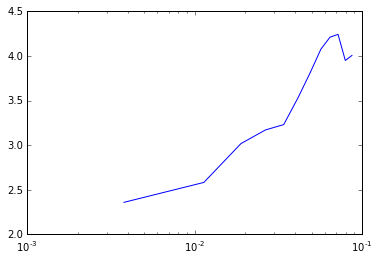

In [9]:
fig, ax = plt.subplots()
ax.plot(r, data['Tx'])
ax.set_xscale('log')

In [10]:
data['Tx']

<Quantity [ 4.0052, 3.9491, 4.2416, 4.2094, 4.0748, 3.8184, 3.5377,
            3.2308, 3.1708, 3.0181, 2.5829, 2.36  ] keV>

In [11]:
coeffs, covariance = np.polyfit(logr, logt, deg=3, w=yerror, full=False, cov=True)
chi2 = np.sum((np.polyval(coeffs, logr) - logt)**2)

In [12]:
coeffs2, covariance = poly.polyfit(logr,logt,deg=3, full=False, cov=True)

TypeError: polyfit() got an unexpected keyword argument 'cov'

In [13]:
coeffs

array([-0.03910386, -0.43712524, -1.3441657 ,  0.17799352])

In [14]:
coeffs2

NameError: name 'coeffs2' is not defined

In [15]:
fit = poly.polyval(logr,coeffs2)

NameError: name 'coeffs2' is not defined

In [16]:
ax.plot(r, fit, marker='o', color='red')


NameError: name 'fit' is not defined

In [17]:
efit = np.exp(fit)
fig, ax = plt.subplots()
ax.plot(r, efit)
ax.set_xscale('log')

NameError: name 'fit' is not defined

In [31]:
lowerbound.value

array([ 4.35086,  4.32283,  4.65284,  4.60928,  4.45825,  4.16584,
        3.88903,  3.48845,  3.43154,  3.25772,  2.78776,  2.55   ])

In [20]:
lowerbound = data['Tx'] + data['Txerr']

In [21]:
upperbound = data['Tx'] + data['Txerr']

Now fitting    |  3rd order polynomial to log temperature profile


ValueError: setting an array element with a sequence.

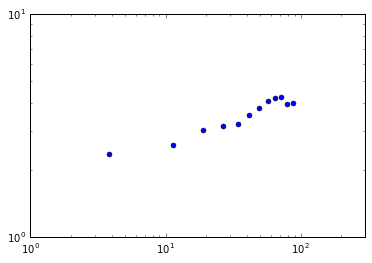

In [25]:
rain.logTemp_fit(data)

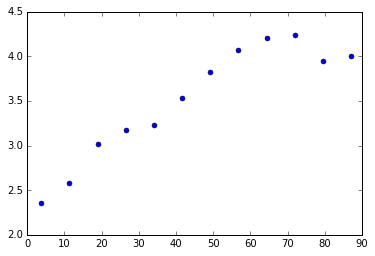

In [27]:
import astropy.units as u
plt.figure()
plt.plot(r.to(u.kpc), data['Tx'], marker='o', markersize=5, linestyle='None')


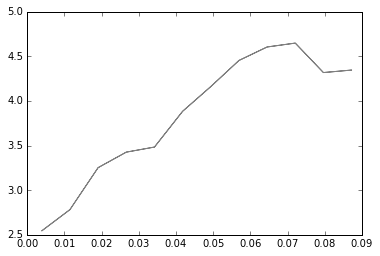

In [33]:
plt.fill_between(r.value, lowerbound.value, upperbound.value, facecolor='blue', alpha=0.5)